Successfully added node BankOfAmerica as a bank node.
Successfully added node Chase as a bank node.
Successfully added node FirstFinancial as a bank node.
Successfully added node Olivia as a individual node.
Successfully added node Betty as a individual node.
Successfully added node ScamGov as a fraudster node.
Successfully added node ScamCo as a fraudster node.
Successfully added node acc_olivia as a account node.
Successfully added node acc_betty as a account node.
Successfully added node acc_scamgov as a account node.
Added ownership relationship between Olivia -> acc_olivia
Added ownership relationship between Betty -> acc_betty
Added ownership relationship between ScamGov -> acc_scamgov
['BankOfAmerica', 'Chase', 'FirstFinancial', 'Olivia', 'Betty', 'ScamGov', 'ScamCo', 'acc_olivia', 'acc_betty', 'acc_scamgov']
[('Olivia', 'acc_olivia', {'rel': 'owns'}), ('Betty', 'acc_betty', {'rel': 'owns'}), ('ScamGov', 'acc_scamgov', {'rel': 'owns'})]
FraudEnv with 10 nodes and 3 edges.


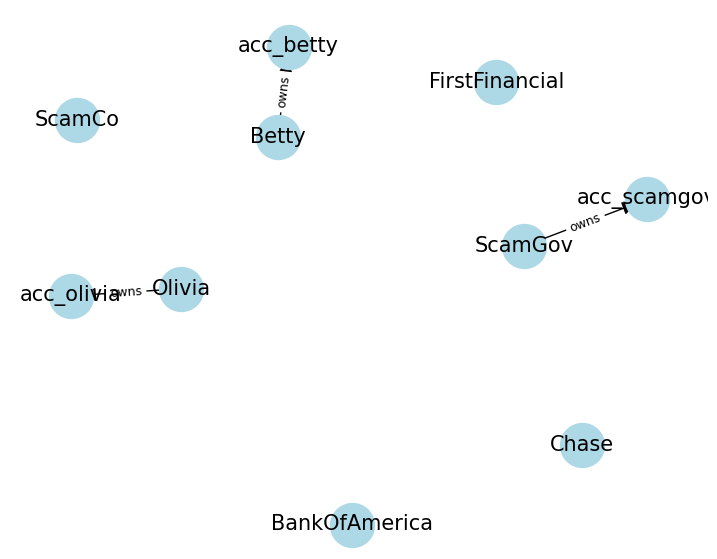

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

class FraudEnv():
    def __init__(self):
        # init graph
        self.G = nx.DiGraph()

        self.NODE_TEMPLATES = {
            "individual": {
                "role": "individual",
            },
            "fraudster": {
                "role": "fraudster",
                "status": "active",
                "description": None,
            },
            "bank": {
                "role": "bank",
            },
            "account": {
                "role": "account",
                "owner": None,
                "bank": None,
                "balance": 0.0,
                "status": "active",  # could be 'active', 'flagged', 'frozen', etc.
                "compromised": False
            }
        }
    
    def add_node_with_attribute(self, node_id, node_type, custom_attrs=None):
        if node_type not in self.NODE_TEMPLATES:
            raise ValueError(f"Unknown node type: '{node_type}'")
        attr = self.NODE_TEMPLATES[node_type].copy()
        if custom_attrs:
            invalid_attr = [i for i in custom_attrs if i not in attr]
            if invalid_attr:
                raise ValueError(f"Invalid keys: {invalid_attr}")
            attr.update(custom_attrs)
        self.G.add_node(node_id, **attr)
        print(f"Successfully added node {node_id} as a {node_type} node.")

    def add_ownership_edge(self, node_id1, node_id2):
        self.G.add_edge(node_id1, node_id2, rel="owns")
        print(f"Added ownership relationship between {node_id1} -> {node_id2}")

    def get_nodes(self):
        return list(self.G.nodes)

    def get_edges(self):
        return list(self.G.edges(data=True))

    def get_graph(self):
        return self.G
    
    def get_individuals(self):
        return [node for node, data in self.G.nodes(data=True) if data.get('role') == 'individual']
    
    def get_fraudsters(self):
        return [node for node, data in self.G.nodes(data=True) if data.get('role') == "fraudster"]
    
    def get_banks(self):
        return [node for node, data in self.G.nodes(data=True) if data.get('role') == "bank"]
    
    def get_acc(self):
        return [node for node, data in self.G.nodes(data=True) if data.get('role') == "account"]

    
    def update_balance(self, acc_from, acc_to, amount):
        self.G.nodes[acc_from]["balance"] -= amount
        self.G.nodes[acc_to]["balance"] += amount

    
    # MAYBE IMPLEMENT LATER
    # def get_acc_balances(self):
    
    def reset(self):
        self.G.clear()
        print("Graph has been reset.")

    def __str__(self):
        return f"FraudEnv with {self.G.number_of_nodes()} nodes and {self.G.number_of_edges()} edges."
    
    def draw_graph(self):
        pos = nx.spring_layout(self.G, k = 0.5)
        plt.figure(figsize=(9, 7))
        nx.draw_networkx_nodes(self.G, pos, node_color='lightblue', node_size=1000)
        nx.draw_networkx_labels(self.G, pos, font_size=15)
        nx.draw_networkx_edges(self.G, pos, arrows=True, arrowstyle='-|>', arrowsize=20)
        nx.draw_networkx_edge_labels(self.G, pos, edge_labels={(u, v): d.get('rel', '') for u, v, d in self.G.edges(data=True)}, font_size = 9)
        plt.axis('off')
        plt.show()


# Testing
if __name__ == "__main__":
    env1 = FraudEnv()

    # Add banks
    env1.add_node_with_attribute("BankOfAmerica", "bank")
    env1.add_node_with_attribute("Chase", "bank")
    env1.add_node_with_attribute("FirstFinancial", "bank")

    # Add individuals
    env1.add_node_with_attribute("Olivia", "individual")
    env1.add_node_with_attribute("Betty", "individual")

    # Add fraudsters
    env1.add_node_with_attribute("ScamGov", "fraudster", {"description": "Impersonates gov for SID"})
    env1.add_node_with_attribute("ScamCo", "fraudster", {"description": "Impersonates gov for SID"})

    # Add accounts (using valid banks)
    env1.add_node_with_attribute("acc_olivia", "account", {"owner": "Olivia", "bank": "BankOfAmerica", "balance": 60000.00})
    env1.add_node_with_attribute("acc_betty", "account", {"owner": "Betty", "bank": "Chase", "balance": 4000.00})
    env1.add_node_with_attribute("acc_scamgov", "account", {"owner": "ScamGov", "bank": "FirstFinancial", "balance": 0.00})

    # Add ownership edges
    env1.add_ownership_edge("Olivia", "acc_olivia")
    env1.add_ownership_edge("Betty", "acc_betty")
    env1.add_ownership_edge("ScamGov", "acc_scamgov")

    # Show result
    print(env1.get_nodes())
    print(env1.get_edges())
    print(env1)
    env1.draw_graph()

In [16]:
print(env1.G.nodes["Olivia"])
print(env1.get_nodes())
print(env1.get_individuals())


{'role': 'individual'}
['BankOfAmerica', 'Chase', 'FirstFinancial', 'Olivia', 'Betty', 'ScamGov', 'ScamCo', 'acc_olivia', 'acc_betty', 'acc_scamgov']
['Olivia', 'Betty']


In [22]:
i = ", ".join(env1.get_individuals())
f = ", ".join(env1.get_fraudsters())
b = ", ".join(env1.get_banks())
a = ", ".join(env1.get_acc())
print(i,f,b,a)


Olivia, Betty ScamGov, ScamCo BankOfAmerica, Chase, FirstFinancial acc_olivia, acc_betty, acc_scamgov
